<a href="https://colab.research.google.com/github/janorena/PDI/blob/main/PDI_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jorge Andrés Noreña García
# Fredy Alexander Méndez Bustamante

In [ ]:
from __future__ import division             # forces floating point division 
import numpy as np                          # Numerical Python 
import matplotlib.pyplot as plt             # Python plotting
from PIL import Image                       # Python Imaging Library
from numpy.fft import fft2, fftshift, ifft2 # Python DFT

from ipywidgets import interact

from google.colab import drive
import requests
import os
#drive.mount('/content/gdrive')


# Show plots in the notebook (don't use it in Python scripts)
%matplotlib inline

In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1UcwwYRducSes_wW1eXL5-0BK7sU_7raU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('fox1.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"1WsVVShWU6a3WA5hNVXFpXrhLQvjbpFOi"})   # replace the id with id of file you want to access
downloaded.GetContentFile('vertical.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"1RWBJ5mqFgmouxdMf_N2KlpkRRGi_4rx0"})   # replace the id with id of file you want to access
downloaded.GetContentFile('pais.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"1K-_cWj1ev8_y0bQD2u2lffsXtpCcjewe"})   # replace the id with id of file you want to access
downloaded.GetContentFile('lobo.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"14MQrPQGNfiXyDba0x_rJKNAVcaVHaMPN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('ejemplo.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"1rnRgvak4l184_qbLdQsu67uptBuk1r0i"})   # replace the id with id of file you want to access
downloaded.GetContentFile('onepunch.jpg')

In [ ]:
ls

adc.json     fox1-256x256.png     lobo.jpg      sample_data/
drive/       fox1_compressed.jpg  onepunch.jpg  vertical.jpg
ejemplo.jpg  fox1.jpg             pais.jpg


#Espectro de una imagen sinusoidal en el eje horizontal

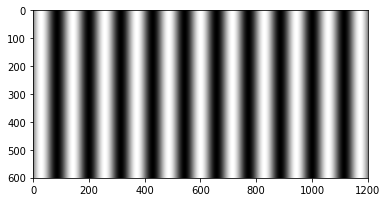

In [ ]:
hW, hH = 600, 300
hFreq = 10.5

# Mesh on the square [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columns (Width)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # rows (Height)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFreq*2*np.pi*X)

plt.imshow(A, cmap = 'gray');
H,W = np.shape(A)

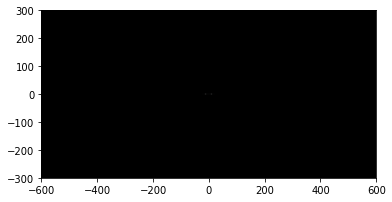

In [ ]:
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P, extent = [-hW,hW,-hH,hH]);

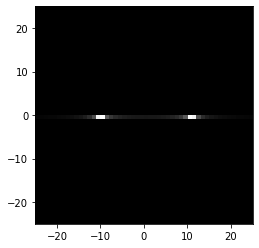

In [ ]:
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

#Espectro de imagen oscilante con rotación

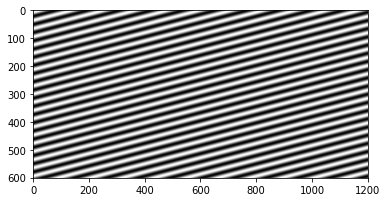

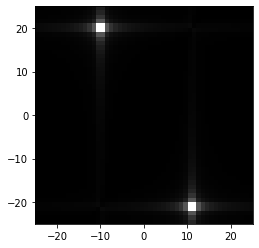

In [ ]:
hFreq = 10.5
vFreq = 20.5

A2 = np.sin(hFreq*2*np.pi*X + vFreq*2*np.pi*Y)

plt.figure()
plt.imshow(A2, cmap = 'gray');

F2 = fft2(A2)/(W*H)                          
F2 = fftshift(F2)
P2 = np.abs(F2)

plt.figure()
plt.imshow(P2[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

#Espectro de fotografía con patrones periódicos

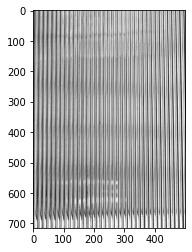

In [ ]:
I = Image.open("vertical.jpg")
I = I.convert('L')                     # 'L' for gray scale mode
A3 = np.asarray(I, dtype = np.float32)  # Image class instance, I1, to float32 Numpy array, a

H,W = np.shape(A3)
hW = np.fix(0.5*W)
hH = np.fix(0.5*H)

plt.imshow(A3, cmap = 'gray');

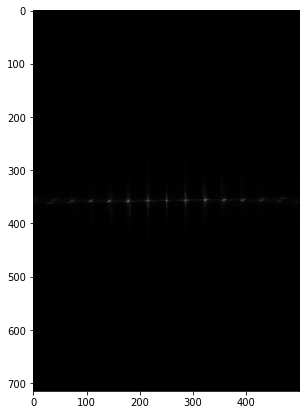

In [ ]:
F3 = fft2(A3)/(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)

r = 100
plt.figure(figsize=(18,7))
plt.imshow(np.log(1+P3));

#Patrones periódicos con ruido y rotación

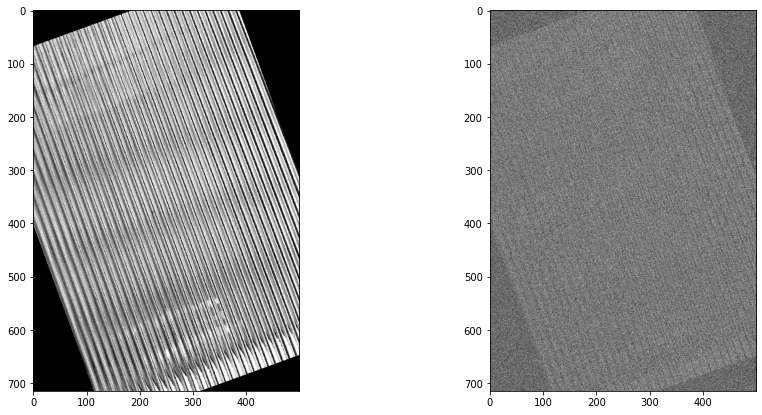

In [ ]:
from PIL import Image
rotated     = I.rotate(20)
Array = np.asarray(rotated, dtype = np.float32)


nf=250
noisyArray=nf*np.random.randn(715,500) + Array 



plt.figure(figsize=(15,7))
plt.subplot(121)
plt.imshow(Array, cmap = 'gray');

plt.subplot(122)
plt.imshow(noisyArray, cmap = 'gray');

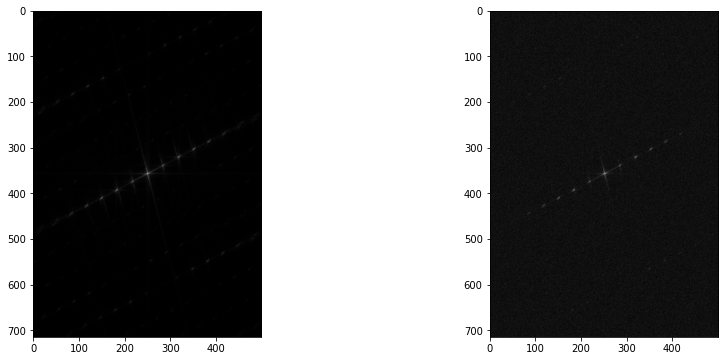

In [ ]:
F3 = fft2(Array)/(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)

F3_n = fft2(noisyArray)/(W*H)                          
F3_n = fftshift(F3_n)
P3_n = np.abs(F3_n)


r = 100
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(np.log(1+P3))

plt.subplot(122)
plt.imshow(np.log(1+P3_n))

#Imagen de anime


(168, 300) ppi


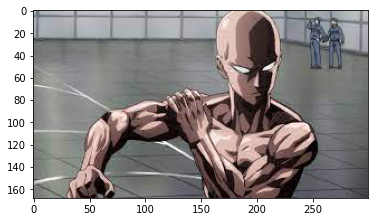

In [ ]:
import cv2
from PIL import Image
I= Image.open("onepunch.jpg")
plt.imshow(I)
img = cv2.imread("onepunch.jpg")
print(img.shape[0:2], "ppi")

#Detección de bordes

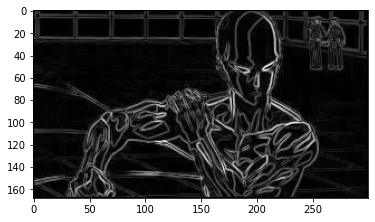

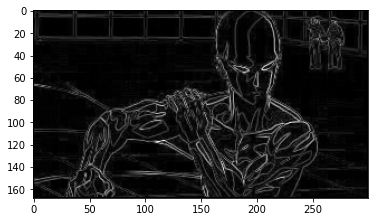

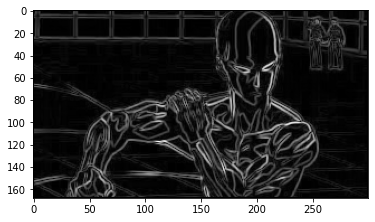

In [ ]:

# Librerias necesarias
from skimage import io
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Abrimos la imagen
imagen = io.imread("onepunch.jpg")
imagen_g = rgb2gray(imagen)

# Filtros: sobel, roberts, prewitt
filtros = [filters.sobel, filters.roberts, filters.prewitt]

for filtro in filtros:
    # Aplicamos cada uno de los filtros
    img_fil = filtro(imagen_g)
    
    # Mostramos los resultados 
    plt.imshow(img_fil)
    plt.show()

# Mejoramiento de contraste

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


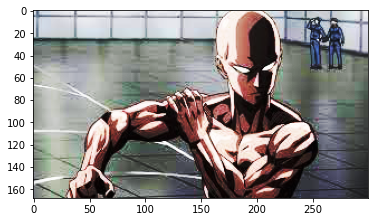

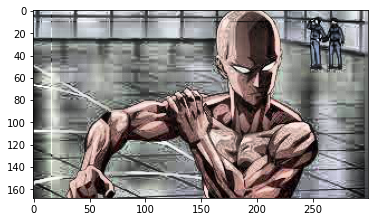

In [ ]:
from skimage import exposure
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

imagen = io.imread("onepunch.jpg")

# Estiramiento de contraste
p2, p98 = np.percentile(imagen, (2,98))
img_rescale = exposure.rescale_intensity(imagen, in_range=(p2,p98))

# Ecualización
img_eq = exposure.equalize_hist(imagen)

# Ecualización adaptiva
img_adapteq = exposure.equalize_adapthist(imagen, clip_limit=0.03)

for eq in (img_eq, img_adapteq):
    plt.imshow(eq)
    plt.show()

# Ruido en imagenes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow 

Estimated Gaussian noise standard deviation = 0.1206873862766877


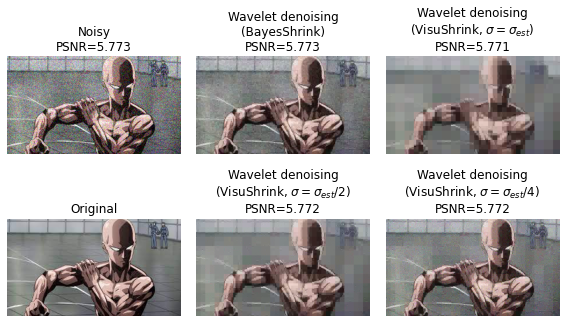

In [ ]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

original = io.imread("onepunch.jpg")
#original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.12
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est, rescale_sigma=True)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2, rescale_sigma=True)
im_visushrink4 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4, rescale_sigma=True)

# Compute PSNR as an indication of image quality
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}'.format(psnr_bayes))
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink)
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2)
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4)
fig.tight_layout()

plt.show()

# histograma RGB

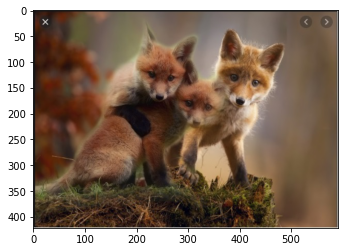

In [ ]:
from PIL import Image
I= Image.open("fox1.jpg")
plt.imshow(I)

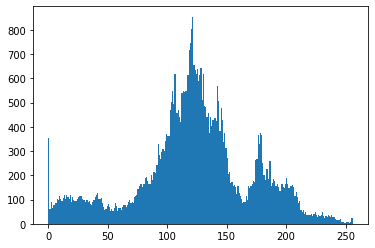

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('onepunch.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

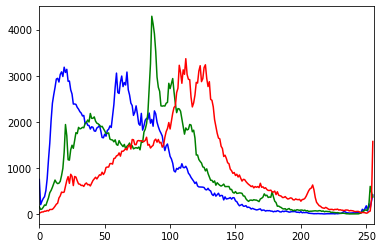

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('fox1.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


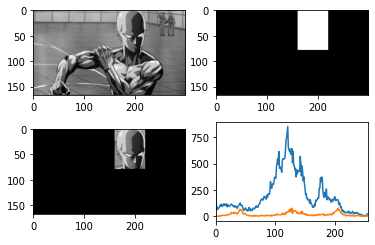

In [ ]:
img = cv2.imread('onepunch.jpg',0)
 
# crear máscara
mask = np.zeros(img.shape[:2], np.uint8)
mask[0:80, 160:220] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
 
# Calcular el histohrama con máscara y sin máscara
# Fijar el tercer argumento como "mask"
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()

#Disminución de resolución

(422, 591) ppi img original
(256, 256) ppi img disminuida
73412 peso original
98674 peso baja resolucion


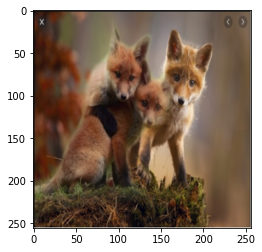

In [ ]:
import cv2
from PIL import Image
import os
#compro,e
img = Image.open('fox1.jpg')
new_img = img.resize((256,256))
#guarda
new_img.save('fox1-256x256.png','png')
#plotea
I1= Image.open("fox1-256x256.png")
plt.imshow(I1)
#imprime vectores ppi
img = cv2.imread("fox1.jpg")
print(img.shape[0:2], "ppi img original")
img = cv2.imread("fox1-256x256.png")
print(img.shape[0:2], "ppi img disminuida")
print(os.stat('fox1.jpg').st_size,"peso original")
print(os.stat('fox1-256x256.png').st_size,"peso baja resolucion")

#compresion

In [ ]:
# Open the image
im = Image.open("onepunch.jpg")
# Now save it
im.save("fox1_compressed.jpg", format="JPEG", quality=80)
I2= Image.open("fox1_compressed.jpg")
print(os.stat('fox1.jpg').st_size,"peso original")
print(os.stat('fox1_compressed.jpg').st_size,"peso comprimido")

73412 peso original
12279 peso comprimido


#segmentacion
#Detección de bordes
*Skimage*
*   rank
*   Watershed

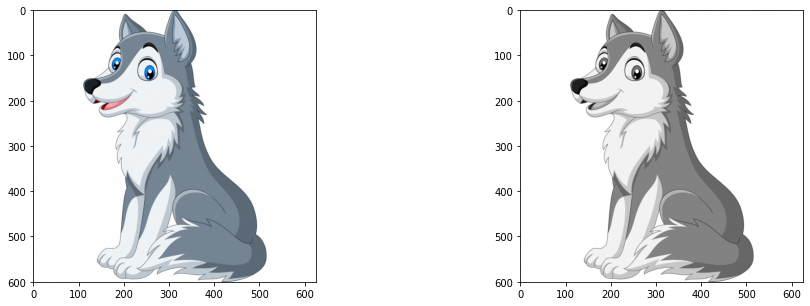

In [ ]:
monza=Image.open("lobo.jpg")
image=monza.convert("L")
image=np.array(image)
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.imshow(monza)
plt.subplot(122)
plt.imshow(image)
plt.show()

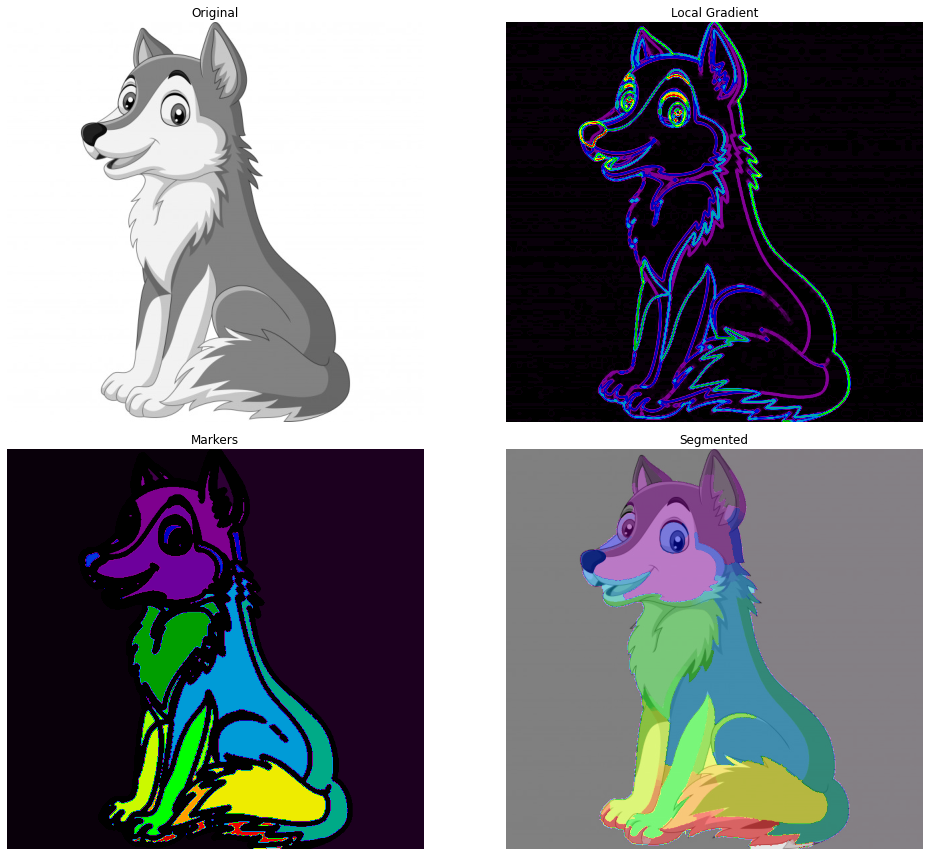

In [ ]:
from skimage.morphology import disk

from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from skimage.segmentation import watershed


# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(4)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5 )
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()


#filtro gaussiano (opacidad)

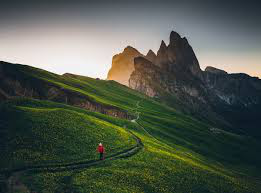

In [ ]:
pais=Image.open("pais.jpg")
pais

In [ ]:
from skimage.filters import gaussian
mz=Image.open("pais.jpg")
array_pais=np.array(pais)
@interact(sigma=(0.1 , 10 , 0.1))
def gauss_filter(sigma=1 ):  
  fltr_pais=gaussian(array_pais, sigma=sigma)
  plt.figure(figsize=(18,12))
  plt.subplot(121)
  plt.imshow(pais)  
  plt.subplot(122)
  plt.imshow(fltr_pais)
  plt.show()
  
@interact(n_bits=(1,8,1))
def cuantizar(n_bits=8):  
  mz_q=mz.quantize(2**n_bits)
  plt.figure(figsize=(20,8))
  plt.subplot(121)
  plt.title("Original (8bits)")
  plt.imshow(mz)
  plt.subplot(122)
  title=str(n_bits)+" bits"
  plt.title(title)
  plt.imshow(mz_q)

interactive(children=(FloatSlider(value=1.0, description='sigma', max=10.0, min=0.1), Output()), _dom_classes=…

interactive(children=(IntSlider(value=8, description='n_bits', max=8, min=1), Output()), _dom_classes=('widget…

#*Skimage*
*SLIC*.


* Si sigma> 0 , la imagen se suaviza con un kernel gaussiano antes de la segmentación.

* Si sigma es escalar y se proporciona un espaciado , el ancho del núcleo se divide a lo largo de cada dimensión por el espaciado. Por ejemplo, si sigma=1 y , el sigma efectivo es . Esto asegura un suavizado sensible para imágenes anisotrópicas.spacing=[5, 1, 1][0.2, 1, 1]

* La imagen se cambia de escala para que esté en [0, 1] antes del procesamiento.

* Las imágenes de forma (M, N, 3) se interpretan como imágenes 2D RGB de forma predeterminada. Para interpretarlos como 3D con la última dimensión de longitud 3, use multicanal = Falso.

* start_label se introduce para manejar el problema [4] . Las etiquetas que se indexan a partir de 0 quedarán obsoletas en versiones futuras. Si la máscara no es Ninguna, la indexación de etiquetas comienza en 1 y el área enmascarada se establece en 0.

In [ ]:
from skimage.segmentation import slic
from skimage.data import astronaut
img = Image.open("pais.jpg")
#Al aumentar el parámetro de compacidad se obtienen más regiones cuadradas
@interact(compactness=(1 , 100 , 1))
def gauss_filter(compactness=1 ):  
  segments = slic(img, n_segments=100, compactness=compactness)
  plt.figure(figsize=(18,12))
  plt.subplot(121)
  plt.imshow(pais)  
  plt.subplot(122)
  plt.imshow(segments)
  plt.show()
@interact(n_segments=(1 , 100 , 1))
def gauss_filter(n_segments=1 ):  
  segments = slic(img, n_segments=n_segments, compactness=100)
  plt.figure(figsize=(18,12))
  plt.subplot(121)
  plt.imshow(pais)  
  plt.subplot(122)
  plt.imshow(segments)
  plt.show()

interactive(children=(IntSlider(value=1, description='compactness', min=1), Output()), _dom_classes=('widget-i…

interactive(children=(IntSlider(value=1, description='n_segments', min=1), Output()), _dom_classes=('widget-in…

#Fourier como codificador de texturas:

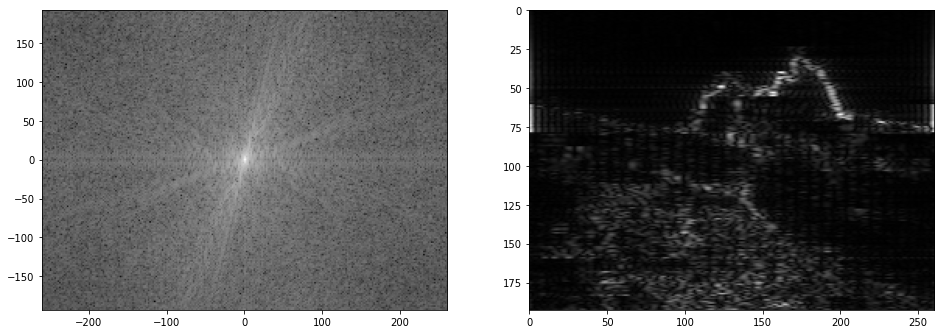

In [ ]:
mz1=Image.open("pais.jpg")
img=np.array(mz1.convert('L'))
H,W = np.shape(img)
F = fft2(img)/(W*H)                          
F = fftshift(F)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(np.log(np.abs(F))  , extent = [-W,W,-H,H])
F[0:200 , 0:200]=0
new=ifft2(F)
plt.subplot(122)
plt.imshow(np.abs(new))

#Función de convolución

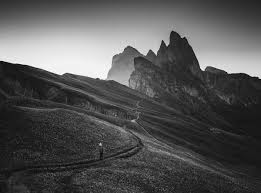

In [ ]:
pais_L=pais.convert("L")
pais_L

In [ ]:
def convolucion(Imagen, Kernel,n):  
  Kernel = np.flipud(np.fliplr(Kernel))  
  output = np.zeros_like(Imagen)
  
  image_padded = np.zeros((Imagen.shape[0] + n-1, Imagen.shape[1] + n-1))
  image_padded[1:-1, 1:-1] = Imagen

  
  for x in range(Imagen.shape[1]):
      for y in range(Imagen.shape[0]):          
          output[y, x]=(Kernel * image_padded[y: y+n, x: x+n]).sum()
  return output

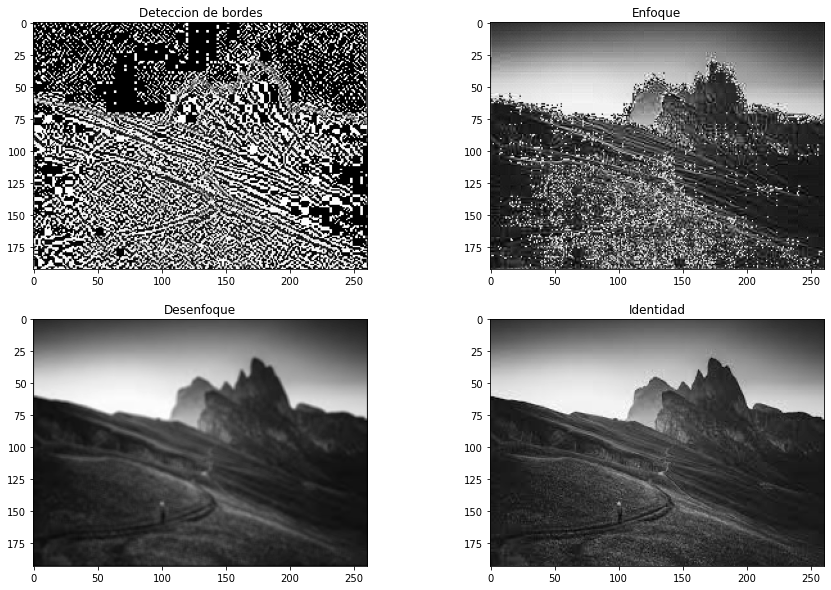

In [ ]:
K1=np.array([(1,0,-1),  #DETECCIÓN DE BORDES
            (0,0,0),
            (-1,0,1)])

K2=np.array([(0,-1,0),  #ENFOQUE
            (-1,5,-1),
            (0,-1,0)])


K3=np.array([(1,1,1),   #DESENFOQUE
            (1,1,1),
            (1,1,1)])/9

K4=np.array([(0,0,0),  #IDENTIDAD
            (0,1,0),
            (0,0,0)])

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(convolucion( np.array(pais_L) ,K1 ,3))
plt.title('Deteccion de bordes')


plt.subplot(222)
plt.imshow(convolucion( np.array(pais_L) ,K2 ,3))
plt.title('Enfoque')



plt.subplot(223)
plt.imshow(convolucion( np.array(pais_L) ,K3 ,3))
plt.title('Desenfoque')



plt.subplot(224)
plt.imshow(convolucion( np.array(pais_L) ,K4 ,3))
plt.title('Identidad')


plt.show()

#Función de erosión y dilatación

#Erosión
Similar a la convolución 2D, en el proceso de erosionado un kernel se desliza a través de la imagen. Un píxel de la imagen original (1 ó 0) sólo se considerará 1 si todos los píxeles que caen detro de la ventana del kernel son 1, de lo contrario se erosiona (se hace a cero). Por tanto, todos los píxeles cerca de los bordes de los objetos en la imagen serán descartados dependiendo del tamaño del kernel. Como consecuencia, el grosor o el tamaño de los objetos en primer plano disminuye o, en otras palabras, la región blanca disminuye en la imagen. Este procedimiento es útil para eliminar pequeños ruidos blancos, separar dos objetos conectados, etc. A continuación un ejemplo donde se utiliza un kernel de 7×7 formado por unos.
#Dilatación
El proceso de dilatación es justo lo opuesto a la erosión. Aquí, un elemento de píxel es ‘1’ si al menos un píxel de la imagen de los que caen dentro de la ventana del kernel es ‘1’. Por lo tanto, la dilatación aumenta el tamaño de los objetos de primer plano, es decir, la región blanca. Normalmente, en casos como la eliminación del ruido, la erosión es seguida de dilatación. La razón para esto es que aunque la erosión elimina los ruidos blancos también encoge los objetos. Por tanto, para recuperar el tamaño inicial, este se dilata. La transformación de dilatación también es útil para unir partes rotas de un objeto. A continuación un ejemplo de cómo la dilatación funciona.

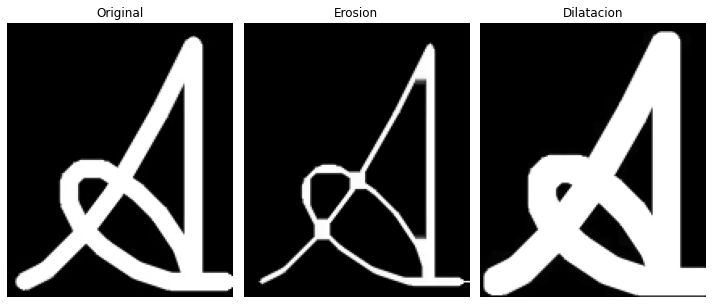

In [ ]:
import cv2
import numpy as np

img = cv2.imread('ejemplo.jpg',0)
kernel = np.ones((7,7),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilatacion = cv2.dilate(img,kernel,iterations = 1)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10),sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")

ax[1].imshow(erosion)
ax[1].set_title("Erosion")

ax[2].imshow(dilatacion)
ax[2].set_title("Dilatacion")


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()